In [8]:
import numpy as np
import pandas as pd
from numpy import random
import random
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving A2Q2Data_train.csv to A2Q2Data_train.csv


In [255]:
data=pd.read_csv('A2Q2Data_train.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.58351,0.379390,0.839750,0.086861,0.611920,0.39203,0.189640,0.585090,0.89494,0.393850,0.062038,0.72616,0.707220,0.234570,0.469650,0.882640,0.79164,0.13159,0.036688,0.733460,0.84950,0.612550,0.610450,0.23291,0.485940,0.423040,0.216750,0.070333,0.39345,0.91542,0.01966,0.028469,0.43144,0.883380,0.987680,0.929500,0.895300,0.55043,0.045496,0.72057,...,0.534300,0.820490,0.584550,0.243980,0.985780,0.21629,0.403630,0.133550,0.797860,0.86640,0.878210,0.470610,0.984170,0.49901,0.494880,0.560650,0.250180,0.96773,0.425400,0.047506,0.62456,0.90287,0.27634,0.33391,0.45884,0.27900,0.70096,0.719810,0.171000,0.595790,0.51706,0.20535,0.829990,0.24995,0.319800,0.19674,0.958550,0.849480,0.923690,1.9741
1,0.86622,0.451350,0.934790,0.235810,0.504880,0.49742,0.117220,0.574880,0.71051,0.336890,0.608290,0.50955,0.019038,0.150970,0.030366,0.182380,0.72407,0.30008,0.256870,0.071868,0.22583,0.971380,0.028061,0.40178,0.929690,0.712280,0.935110,0.648440,0.88639,0.42374,0.56116,0.139260,0.65031,0.059234,0.350710,0.584530,0.096762,0.46007,0.001262,0.60890,...,0.551250,0.091007,0.412010,0.695830,0.644200,0.55454,0.007456,0.799660,0.590000,0.66175,0.758380,0.546640,0.070030,0.61851,0.915370,0.860320,0.893460,0.18328,0.327400,0.135820,0.80766,0.94360,0.32582,0.60013,0.76347,0.85428,0.22287,0.018455,0.148300,0.533590,0.27412,0.46065,0.655440,0.56656,0.490620,0.19920,0.320680,0.414190,0.830230,2.3354
2,0.39142,0.919950,0.138730,0.991810,0.543670,0.98449,0.340260,0.206470,0.40131,0.128990,0.126320,0.20168,0.279930,0.217640,0.440110,0.039892,0.14486,0.87135,0.107330,0.716590,0.27636,0.503620,0.113190,0.35442,0.020319,0.955620,0.313940,0.902470,0.69735,0.13239,0.76095,0.192730,0.68994,0.998050,0.047253,0.541340,0.322640,0.10621,0.597410,0.39388,...,0.583530,0.999320,0.512070,0.459310,0.936480,0.67159,0.178450,0.886770,0.012955,0.57806,0.782930,0.245450,0.778020,0.81165,0.620520,0.763380,0.456790,0.35245,0.229590,0.624210,0.38468,0.47702,0.97065,0.91283,0.51297,0.18225,0.42164,0.256070,0.097739,0.251740,0.27247,0.38911,0.799490,0.57753,0.866820,0.69741,0.628630,0.294790,0.542800,2.2053
3,0.79553,0.278540,0.228900,0.789290,0.492220,0.67084,0.769410,0.057104,0.20393,0.086936,0.064380,0.36584,0.253150,0.202030,0.067376,0.989730,0.30646,0.85280,0.524110,0.756550,0.31831,0.369100,0.450510,0.70262,0.829200,0.641070,0.252270,0.150120,0.81109,0.41140,0.26005,0.801630,0.82562,0.875920,0.234430,0.809200,0.730400,0.98323,0.287750,0.15789,...,0.979860,0.172000,0.001713,0.868900,0.072114,0.12187,0.490940,0.511780,0.364250,0.57088,0.282110,0.891310,0.758780,0.44876,0.640140,0.036639,0.629570,0.14766,0.572110,0.904750,0.47214,0.67075,0.67243,0.61736,0.94458,0.15247,0.10996,0.214430,0.602070,0.068362,0.24901,0.65976,0.943350,0.41246,0.927150,0.11015,0.101310,0.668010,0.345730,2.0400
4,0.65223,0.966650,0.179850,0.354060,0.840420,0.92891,0.014597,0.229530,0.43920,0.548940,0.834600,0.80267,0.445370,0.897530,0.804380,0.411270,0.99720,0.63410,0.565570,0.000590,0.65231,0.153830,0.948260,0.26342,0.157820,0.448350,0.740980,0.189670,0.86908,0.66328,0.15622,0.273410,0.34162,0.863620,0.354320,0.728260,0.576550,0.57002,0.689760,0.50665,...,0.614130,0.706590,0.122480,0.030009,0.030668,0.75171,0.631270,0.056698,0.833330,0.89095,0.068736,0.701080,0.596880,0.59140,0.585850,0.458830,0.695430,0.86650,0.638890,0.445720,0.24667,0.14579,0.20710,0.64127,0.99206,0.41792,0.75349,0.440330,0.181550,0.826180,0.93277,0.23674,0.027077,0.27111,0.233660,0.56356,0.047289,0.627920,0.979300,2.2053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
uploaded=files.upload()

Saving A2Q2Data_test.csv to A2Q2Data_test.csv


In [256]:
def cv_split(dataset, split=0.70):
	train = list()
	cv_size = split * len(dataset)
	cv_set = list(dataset)
	while len(train) < cv_size:
		index = randrange(len(cv_set))
		train.append(cv_set.pop(index))
	return train, cv_set

In [257]:
from random import randrange
df=data.values.tolist()
train,cross=cv_split(df,0.7)
print (np.shape(df))
print (np.shape(train))
print (np.shape(cross))

(10000, 101)
(7000, 101)
(3000, 101)


In [258]:
Z=np.array(df)
y=Z[:,-1]
X=np.delete(Z, -1, axis=1)
n,d=np.shape(X)
print (n,d)

10000 100


In [259]:
Wml=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
Wml

array([-7.84961009e-03, -1.36715320e-02, -3.61656438e-03,  2.64909160e-03,
        1.88551446e-01,  2.65314657e-03,  9.46531786e-03,  1.79809481e-01,
        3.73757317e-03,  4.99608944e-01,  8.35836265e-03,  4.29108775e-03,
        1.42141179e-02,  3.94232414e-03,  9.36795890e-03, -1.12038274e-03,
        3.35727500e-03,  1.16152212e-03, -9.40884707e-03, -2.45575476e-03,
       -1.17409629e-02, -1.01960612e-02,  7.95771321e-03, -1.00574854e-02,
        6.04882939e-03, -4.67345192e-03, -3.09091547e-03,  8.14909193e-03,
        1.20264599e-02, -6.82458163e-03, -8.65405539e-03,  9.86273479e-04,
        4.92968011e-03,  5.99772461e-03, -1.34667860e-02,  1.07075729e-03,
        1.32745992e-02, -1.14148742e-02, -2.01056697e-02,  5.85096240e-01,
        4.94483247e-04, -7.86666920e-04, -2.71926574e-03, -9.54021938e-03,
       -5.44161058e-03,  9.80679209e-03, -6.72540624e-03, -4.45414276e-04,
        6.98516508e-03,  3.16138907e-02,  4.51763485e-01, -8.75221380e-03,
        2.55167390e-03,  

In [260]:
Zt=np.array(train)
ytrain=Zt[:,-1]
Xtrain=np.delete(Zt, -1, axis=1)
nt,dt=np.shape(Xtrain)
print (nt,dt)
print (np.shape(ytrain))

7000 100
(7000,)


In [261]:
Zc=np.array(cross)
ycross=Zc[:,-1]
Xcross=np.delete(Zc, -1, axis=1)
nc,dc=np.shape(Xcross)
print (nc,dc)
print (np.shape(ycross))

3000 100
(3000,)


In [360]:
#L=np.arange(1,2000.0, 100.0)
L=np.arange(0.1,80,10)
L.shape

(8,)

In [361]:
W0=np.random.random(100)
result=[]
step=1e-6
for l in L:
  W=W0
  for i in range(5000):
    W_prev = W[:] 
    a1=np.matmul(Xtrain.T,Xtrain)
    a2=np.matmul(a1,W)
    a3=np.matmul(Xtrain.T,ytrain)
    a4=l*W
    a5=np.subtract(a2,a3)
    grad=np.add(a5,a4)
    W=np.subtract(W,(grad*step))
    if len(W)== len(W_prev) and len(W) == sum([1 for i, j in zip(W, W_prev) if i == j]): 
     break
  y_cp=np.matmul(Xcross,W)
  test_error=0
  for i in range(nc):
    test_error+=(pow((y_cp[i]-ycross[i]),2))
  MSE=test_error/nc
  result.append(MSE)

In [362]:
result

[0.044132347859212565,
 0.044167996058630254,
 0.04429439753566071,
 0.04450416402303952,
 0.04479045850383052,
 0.04514695300169718,
 0.045567789743803266,
 0.04604754541586155]

In [363]:
id=np.argsort(result)
id[0]
Lambda_min=L[id[0]]
Lambda_min

0.1

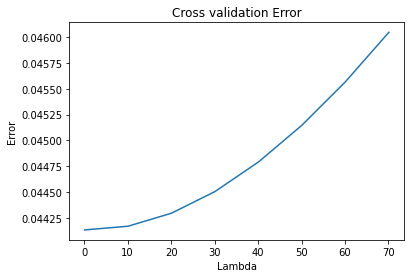

In [364]:
plt.title('Cross validation Error')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.plot(L,result)

In [365]:
WR=np.random.random(100)
step=1e-6
for t in range(1,5000):
  WR_prev=WR[:]
  a1=np.matmul(X.T,X)
  a2=np.matmul(a1,WR)
  a3=np.matmul(X.T,y)
  a4=Lambda_min*WR
  a5=np.subtract(a2,a3)
  grad=np.add(a5,a4)
  WR=np.subtract(WR,(grad*step))
  if len(WR)== len(WR_prev) and len(WR) == sum([1 for i, j in zip(WR, WR_prev) if i == j]): 
   break
   

In [366]:
WR

array([ 1.42609098e-03, -1.53794665e-02, -6.16863770e-04,  5.32091202e-03,
        1.75842793e-01,  5.16860660e-04,  1.19012659e-02,  1.75856919e-01,
        8.16244918e-03,  4.84192675e-01,  1.63908580e-02,  7.48281215e-03,
        2.11848061e-02,  1.28567950e-02,  5.12917437e-03, -8.59510108e-03,
        2.45051724e-03,  8.33945324e-03, -1.13506537e-02,  6.55635224e-03,
       -1.99813244e-02, -1.80019942e-03,  6.25605624e-03, -1.25599755e-02,
        7.87584043e-03,  1.50625091e-03, -1.38437418e-02,  1.05559762e-02,
        1.14033395e-02, -1.64928973e-03, -8.59468116e-03,  7.07315255e-03,
        1.08814508e-03,  4.29627733e-03, -1.10055140e-02,  3.57716041e-03,
        1.18204032e-02, -1.06776299e-02, -1.57112633e-02,  5.75108975e-01,
        2.63736443e-03, -5.97719653e-03, -8.48575432e-03, -2.31706881e-03,
       -1.98953389e-03,  5.38707817e-03, -9.83775345e-03, -7.42530875e-03,
        1.20497672e-02,  2.67813731e-02,  4.43716005e-01, -1.36122845e-02,
        4.35130230e-03, -

In [367]:
data_test=pd.read_csv('A2Q2Data_test.csv',header=None)
data_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.21302,0.446210,0.51432,0.219750,0.495440,0.463670,0.26007,0.28137,0.983820,0.00777,0.15526,0.70728,0.45593,0.324660,0.51295,0.494180,0.106970,0.766310,0.58186,0.40112,0.20531,0.58442,0.94270,0.775050,0.031402,0.619160,0.276250,0.091606,0.277260,0.074446,0.628110,0.072282,0.687080,0.073702,0.72994,0.297720,0.57917,0.18094,0.87356,0.86208,...,0.37097,0.044548,0.57652,0.623370,0.63547,0.27461,0.94543,0.44675,0.328980,0.34928,0.171700,0.79842,0.61159,0.686010,0.428910,0.57603,0.418140,0.885870,0.66536,0.37391,0.34337,0.086108,0.271350,0.886640,0.449900,0.558010,0.221990,0.927320,0.431280,0.70719,0.92910,0.286690,0.45841,0.788740,0.041794,0.58736,0.904910,0.91718,0.68321,2.0121
1,0.32563,0.703990,0.31970,0.045240,0.869680,0.131360,0.47664,0.26632,0.334520,0.81200,0.77116,0.95093,0.68410,0.032855,0.67384,0.955700,0.307000,0.518500,0.15522,0.89576,0.98780,0.33001,0.85459,0.248460,0.614660,0.084424,0.202510,0.829180,0.399040,0.012799,0.308610,0.628680,0.966260,0.219900,0.95646,0.070461,0.69636,0.74594,0.21273,0.97780,...,0.61836,0.578120,0.10255,0.901290,0.59167,0.93347,0.60926,0.31728,0.027238,0.87198,0.691700,0.40112,0.38797,0.316780,0.780420,0.44521,0.786010,0.367690,0.63328,0.93724,0.35888,0.845070,0.888440,0.165670,0.741080,0.036451,0.346950,0.375670,0.116220,0.42360,0.51868,0.255460,0.29498,0.008869,0.169970,0.92325,0.421340,0.90906,0.61539,1.8164
2,0.49539,0.623570,0.58121,0.879160,0.930960,0.203040,0.35752,0.31232,0.066225,0.46389,0.22277,0.91725,0.84965,0.563880,0.12446,0.931970,0.510160,0.163710,0.31961,0.31052,0.24881,0.20316,0.94587,0.681220,0.928040,0.365420,0.692690,0.001116,0.621550,0.025580,0.424830,0.693900,0.287450,0.413780,0.20087,0.838270,0.28828,0.61430,0.93499,0.89937,...,0.87387,0.578390,0.04317,0.285690,0.79263,0.25620,0.45156,0.41992,0.601450,0.78608,0.069417,0.16628,0.43884,0.431520,0.043712,0.87493,0.012291,0.552180,0.33401,0.17434,0.21663,0.808180,0.090009,0.104780,0.741890,0.712190,0.055609,0.220310,0.054623,0.89027,0.85782,0.505300,0.32361,0.693090,0.690430,0.01604,0.467410,0.67303,0.60459,1.6435
3,0.88875,0.013187,0.87982,0.858160,0.793920,0.792390,0.76522,0.85145,0.233610,0.57924,0.29897,0.66401,0.34194,0.864510,0.91258,0.107010,0.953480,0.110260,0.81163,0.97568,0.72366,0.98036,0.75578,0.097834,0.010952,0.574310,0.768930,0.661320,0.808170,0.269920,0.333530,0.562300,0.048470,0.500260,0.20360,0.104470,0.26312,0.06238,0.16232,0.37302,...,0.60953,0.057597,0.86026,0.318440,0.95446,0.05625,0.23768,0.26216,0.564160,0.15128,0.346820,0.89329,0.68181,0.836340,0.206070,0.53490,0.077956,0.006611,0.16736,0.77473,0.86499,0.205200,0.008008,0.416300,0.067111,0.055894,0.297130,0.570850,0.111720,0.55365,0.25535,0.383410,0.55130,0.727730,0.676890,0.84605,0.611160,0.58514,0.41724,2.7451
4,0.15178,0.540760,0.26896,0.006752,0.101020,0.342080,0.86855,0.32698,0.285460,0.80503,0.31657,0.61061,0.21343,0.928510,0.91867,0.931530,0.616980,0.214310,0.96716,0.17833,0.57475,0.73691,0.71545,0.802310,0.780940,0.114520,0.544420,0.300760,0.365650,0.468640,0.411890,0.093033,0.348240,0.966510,0.39851,0.519050,0.12376,0.53924,0.58561,0.48766,...,0.74616,0.456020,0.15145,0.097594,0.23123,0.30437,0.56235,0.19865,0.009274,0.96364,0.547330,0.36145,0.13936,0.375450,0.236850,0.21002,0.410200,0.728840,0.18649,0.92636,0.48645,0.545270,0.125830,0.504710,0.445610,0.844000,0.113870,0.133780,0.969440,0.88045,0.54955,0.129320,0.94848,0.326100,0.268010,0.27125,0.535350,0.91872,0.16801,1.8932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.

In [368]:
df_test=data_test.values.tolist()
Zt=np.array(df_test)
ytest=Zt[:,-1]
Xtest=np.delete(Zt, -1, axis=1)
n_t,d=np.shape(Xtest)
print (n_t,d)

500 100


In [369]:
ypred_r=np.matmul(Xtest,WR)
ypred_ml=np.matmul(Xtest,Wml)

In [370]:
test_error_ml=0
for i in range(n_t):
  test_error_ml+=(pow((ytest[i]-ypred_ml[i]),2))
MSE_ML=test_error_ml/n_t
MSE_ML

0.37072731116979263

In [371]:
test_error_r=0
for i in range(n_t):
  test_error_r+=(pow((ytest[i]-ypred_r[i]),2))
MSE_RR=test_error/n_t
MSE_RR

0.2762852724951693